In [384]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
import csv
from sklearn.manifold import MDS
#n = 250
#n = 500
#n = 1000
n = 450
instance = "le450_25d" #DSJC1000.1 ; DSJR500.1c ; DSJC250.5
reader = csv.reader(open(instance+".spaceAnalysis.csv", "r", encoding="ascii"), delimiter=",")
readerFitness = csv.reader(open(instance + ".spaceAnalysisFitness.csv", "r", encoding="ascii"), delimiter=",")
print('done')

done


In [380]:
result = np.array(list(reader)).astype(np.float)
fitness = np.array(list(readerFitness)).astype(np.float)[0]
print(result)
#print(fitness)

[[  0.   9.   9. ... 367. 367. 368.]
 [  9.   0.   0. ... 369. 369. 370.]
 [  9.   0.   0. ... 369. 369. 370.]
 ...
 [367. 369. 369. ...   0.   0.   0.]
 [367. 369. 369. ...   0.   0.   0.]
 [368. 370. 370. ...   0.   0.   0.]]


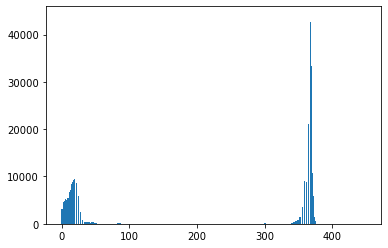

In [381]:
x = np.arange(n)
y = np.zeros(n)
for i in range(0,len(result)):
    for j in range(i+1, len(result)):
        y[int(result[i][j])] += 1

# Make the Chart
plt.bar(x, y)

# Show the Chart
plt.show()

In [382]:
embedding = MDS(n_components=3, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.0025, n_jobs=None, random_state=None, dissimilarity='precomputed')
X_transformed = embedding.fit_transform(result)
x_vals = X_transformed[:,0]
y_vals = X_transformed[:,1]
z_vals = X_transformed[:,2]

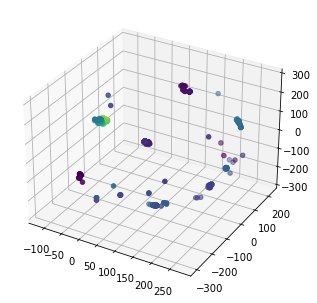

In [383]:
fig = pyplot.figure()
ax = Axes3D(fig)

it = np.arange(1,len(result)+1)

ax.scatter(x_vals, y_vals, z_vals, c=it, label=it)
#ax.legend()
plt.show()